<a href="https://colab.research.google.com/github/Archi-Sailly/website/blob/gh-pages/ML_DecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Decision Tree

In [13]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

# cancer['data'].shape   #x값들만
# cancer['target']  # Y값만 -> 0:악성종양(암), 1:양성종양(정상)
# cancer['feature_names']
# cancer['target_names']
print(cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [14]:
cancer

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [15]:
import pandas as pd

df = pd.DataFrame(cancer['data'] , columns=cancer['feature_names'])
df['Y'] = cancer['target']
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Y
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [34]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()


# train_test_split으로 데이터를 분할하여 train/test 셋으로 구분하세요.
# code here

x_train, x_test, y_train, y_test = train_test_split(cancer['data']
                                                    , cancer['target']
                                                    # , test_size = 0.2
                                                    , random_state=0
                                                    , stratify = cancer['target'] # 층화추출 = 결과값 0,1의 수가 같도록
                                                    )


In [35]:
import numpy as np
np.bincount(cancer['target'])

array([212, 357])

In [36]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((426, 30), (143, 30), (426,), (143,))

In [39]:
# 디시젼 트리 모델 만들고 학습시켜보세요. 정확도를 출력해보세요.
from sklearn.tree import DecisionTreeClassifier

# code here
model = DecisionTreeClassifier()  # 모델 정의
model.fit(x_train,y_train) # 학습
model.score(x_train, y_train), model.score(x_test, y_test) # 정확도

(1.0, 0.9020979020979021)

In [40]:
# 특성중요도
model.feature_importances_

array([0.        , 0.0393304 , 0.00501731, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.0197605 , 0.        , 0.        , 0.00999282, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.03687207, 0.02958161, 0.72534081, 0.00668975, 0.00931787,
       0.00401385, 0.        , 0.10516335, 0.        , 0.00891967])

In [41]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

<Axes: >

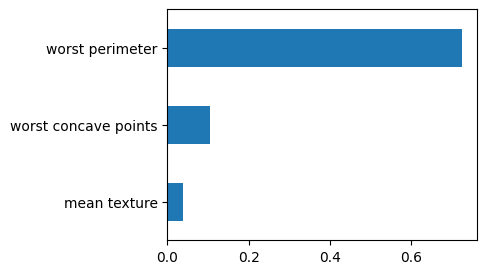

In [55]:
fi = pd.Series(model.feature_importances_, index=cancer['feature_names'])
# fi 데이터를 이용하여 아래와 같은 barh 그래프를 그려보세요.
# code here

fi.sort_values().tail(3).plot(kind='barh'
                            , figsize = (4,3))

In [ ]:
fi[fi != 0].sort_values(ascending=True)

radius error            0.002431
worst compactness       0.004014
symmetry error          0.006690
mean smoothness         0.007526
perimeter error         0.009804
area error              0.009993
mean symmetry           0.011018
worst smoothness        0.018238
mean texture            0.028312
worst texture           0.029582
worst radius            0.036872
worst concave points    0.105163
worst perimeter         0.730358
dtype: float64

- max_depth 조정

In [56]:
model.tree_.max_depth

5

In [62]:
# max_depth를 3으로 조정해보세요.
from sklearn.tree import DecisionTreeClassifier
model3 = DecisionTreeClassifier(max_depth = 3) # code here
model3.fit(x_train, y_train)
model3.score(x_train, y_train), model3.score(x_test, y_test)

(0.9765258215962441, 0.9300699300699301)

In [64]:
#max_depth를 5로 조정해보세요.
from sklearn.tree import DecisionTreeClassifier
model5 = DecisionTreeClassifier(max_depth = 5) # code here
model5.fit(x_train, y_train)
model5.score(x_train, y_train), model5.score(x_test, y_test)

(1.0, 0.9230769230769231)

### 트리 시각화
#### 아래 코드 혹은 첨부 링크로 시각화
 - 링크: http://www.webgraphviz.com/


In [65]:
from sklearn.tree import export_graphviz
export_graphviz(model3,  out_file='model3.dot',
                feature_names=cancer['feature_names'],
                class_names=cancer['target_names'], impurity=True, filled=True)

In [ ]:
!pip install graphviz

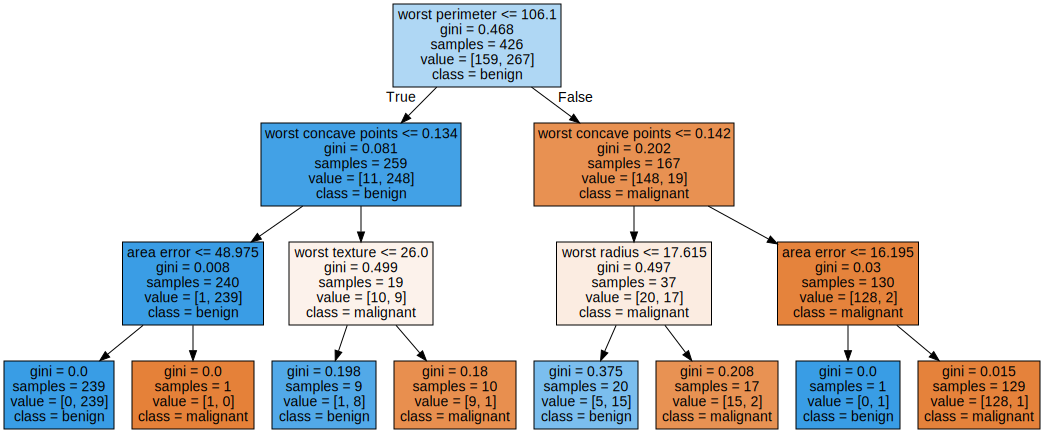

In [66]:
import graphviz
with open('model3.dot') as f:
    data = f.read()
graphviz.Source(data)

In [ ]:
with open('model3.dot') as f:
    data = f.read()
graph =  graphviz.Source(data)
graph.render('model3')

'model3.pdf'

- model5 시각화

In [ ]:
# model5를 시각화 해보세요.

export_graphviz( #code here )



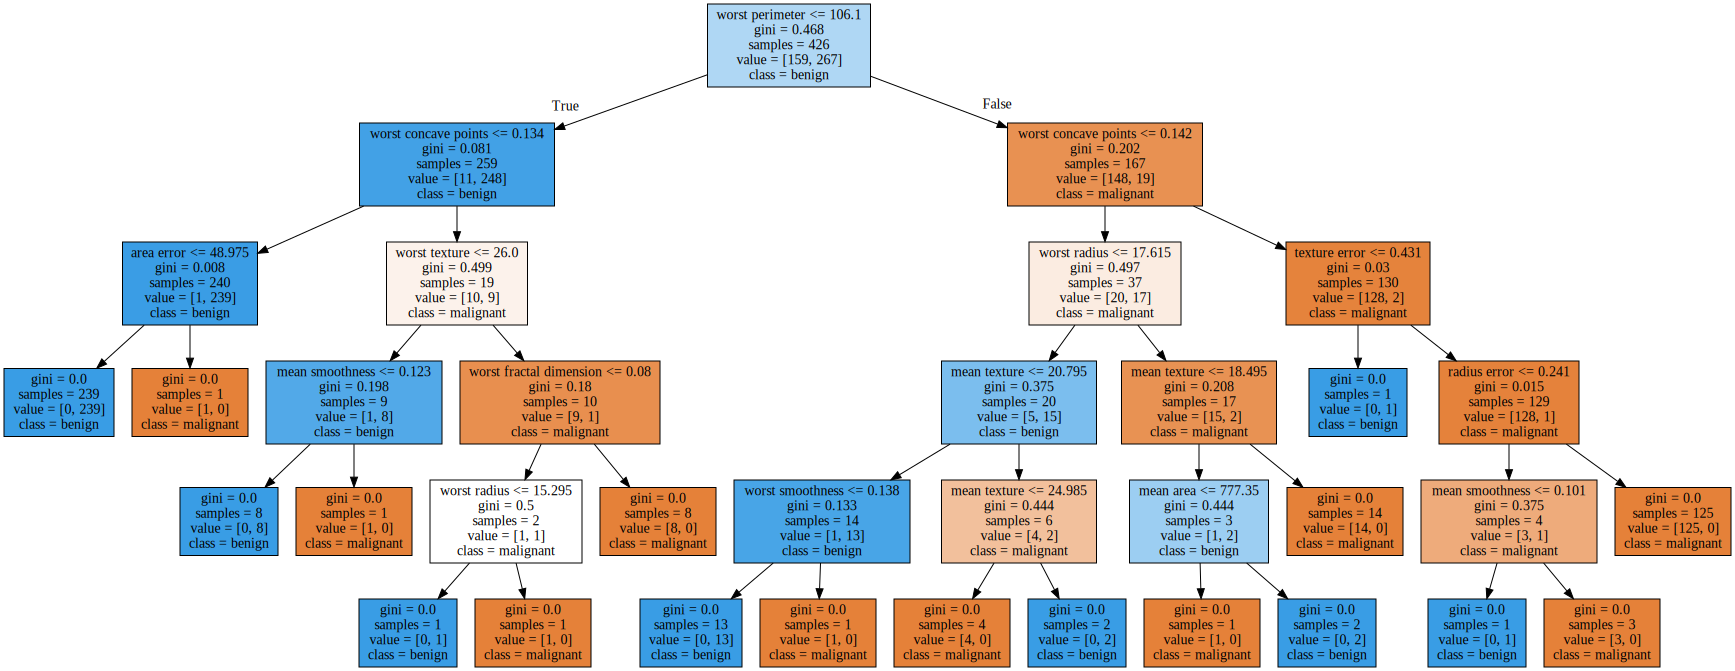

In [ ]:
with open('model5.dot') as f:
    data = f.read()
graphviz.Source(data)

### 연습문제
- Iris 데이터를 의사결정나무 알고리즘으로 모델링하고, 정확도를 출력하세요.

In [78]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()  #데이터셋로딩

###데이터 분할
x_train, x_test, y_train, y_test = train_test_split(iris['data']
                                                    , iris['target']
                                                    # , test_size = 0.2
                                                    , random_state=0
                                                    # , stratify = iris['target'] # 층화추출 = 결과값 0,1의 수가 같도록
                                                    )

### 모델링/학습
model = DecisionTreeClassifier(max_depth = 3)
model.fit(x_train, y_train)

### 성능평가
model.score(x_train, y_train), model.score(x_test, y_test) # 정확도

# fi = pd.Series(model.feature_importances_, index=iris['feature_names'])
# fi.sort_values().tail(3).plot(kind='barh'
#                             , figsize = (4,3))


(0.9821428571428571, 0.9736842105263158)

In [ ]:
# graphviz 를 이용하여 트리를 시각화하세요.
# code here




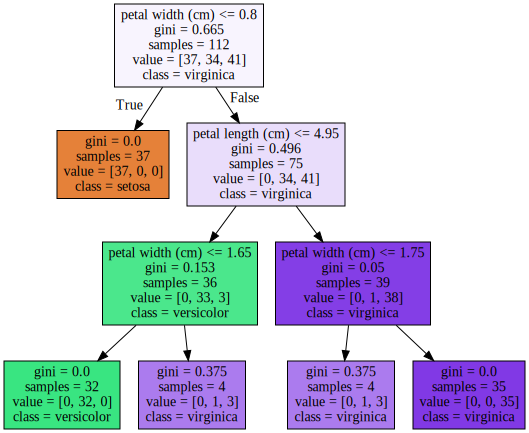

In [ ]:
with open('model_iris.dot') as f:
    data = f.read()
graphviz.Source(data)

# Decision Tree - Regression Tree


In [ ]:
# from sklearn.datasets import load_boston
# boston = load_boston()
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

data = pd.DataFrame(data, columns=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD','TAX', 'PTRATIO', 'B', 'LSTAT'])
target = pd.DataFrame(target, columns=['Target'])

df = pd.concat([data, target], axis=1)
df.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.9,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.9,9.14,21.6


In [ ]:
# 위의 df 열에서 데이터를 분할하여 아래와 같이 train/test로 분할하세요.

# code here

X = # code here
y = # code here

# code here (train_test_split 이용)


print(f'x_train:{x_train.shape} x_test: {x_test.shape}  y_train:{y_train.shape}  y_test: {y_test.shape} ')

x_train:(379, 13) x_test: (127, 13)  y_train:(379,)  y_test: (127,) 


In [ ]:
# 디시젼트리 회귀모델로 모델을 만들고, 학습 시켜 보세요. R2 square 값을 출력해보세요.
from sklearn.tree import DecisionTreeRegressor

# code here


(1.0, 0.6529685721150802)

In [ ]:
model.tree_.max_depth

18

In [ ]:
# max_depth 를 조절하여 다시 학습해보세요.

# code here

(0.8290972700366354, 0.6354364289453209)

In [ ]:
model.feature_importances_

array([0.02528009, 0.        , 0.        , 0.        , 0.        ,
       0.26480489, 0.        , 0.        , 0.        , 0.        ,
       0.02133612, 0.        , 0.6885789 ])

<Axes: >

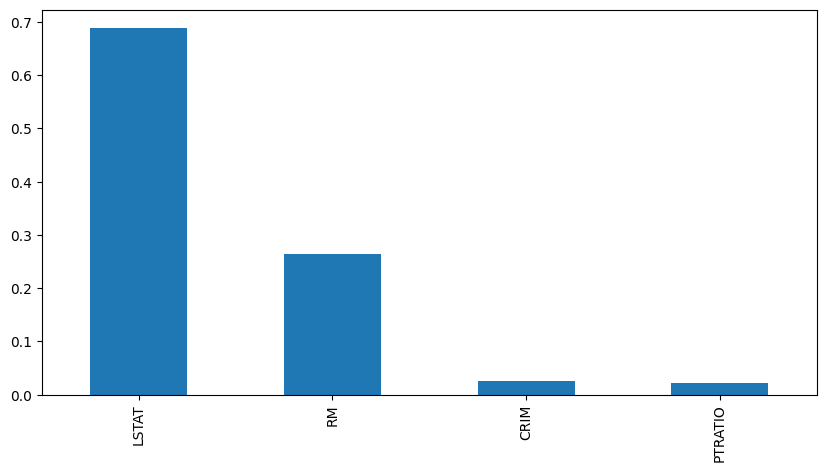

In [ ]:
#특성 중요도 시각화
import pandas as pd
fi = pd.Series(model.feature_importances_, index=X.columns)
fi[fi!=0].sort_values(ascending=False).plot(kind='bar', figsize=(10, 5))

In [ ]:
# graphviz를 사용하여 시각화
from sklearn.tree import export_graphviz
export_graphviz(model, out_file='model.dot',
                feature_names=X.columns,
                impurity=True, filled=True)

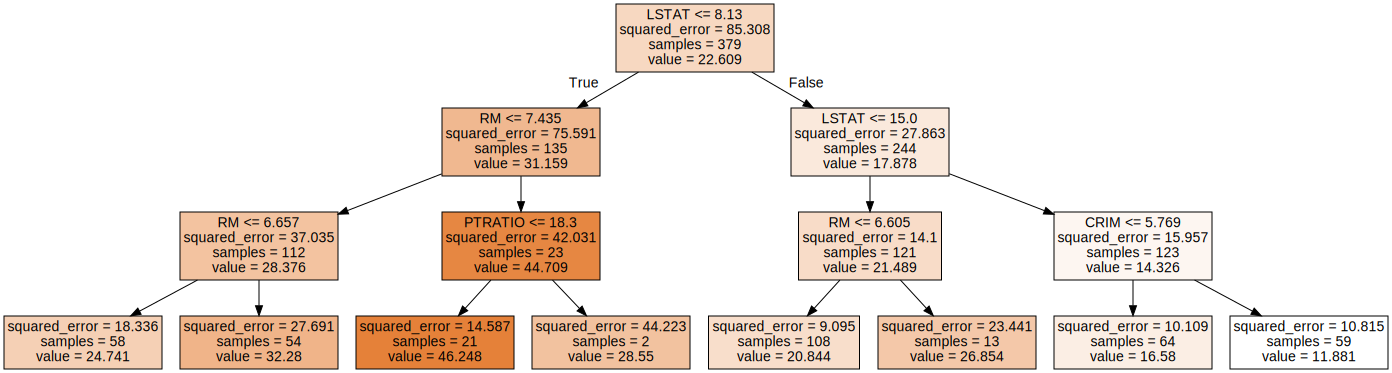

In [ ]:
import graphviz

with open('model.dot') as f:
    data = f.read()
graphviz.Source(data)